In [53]:

import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import accuracy_score

In [54]:
file_path= '/kaggle/input/water-potability/water_potability.csv'
df=pd.read_csv(file_path)

if 'Unnamed:0' in df.columns:
    df.drop(columns='Unnamed:0', inplace=True)
    
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [55]:

print(df.shape)

df.info()

df.describe()

(3276, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [57]:
# Missing values

df.isnull().sum()
df=df.dropna().reset_index(drop=True)

In [70]:
# Outliers
def Outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    low = q1 - 1.5 * (IQR)
    upp = q3 + 1.5 * (IQR)
    return column[(column < low) | (column > upp)]

outliers_dict ={}

for column in df.select_dtypes(include=['number']):
    outliers = Outliers(df[column])
    if not outliers.empty:
        outliers_dict[column]=outliers
      
        
for column, outliers in outliers_dict.items():
    print(f"potantial outliers: '{column}:")
    print(outliers)
                                            

                           
def setOutliers(column):    
    
   x=Outliers( column)
   x_index=x.index
   df.loc[x_index, column.name]=column.mean()
   return x

for column in df.select_dtypes(include=['number']):
    setOutliers(df[column])


potantial outliers: 'ph:
1887    10.817831
Name: ph, dtype: float64
potantial outliers: 'Hardness:
125     269.809407
737     122.906991
922     271.630824
962     121.575139
998     271.601212
1022    123.336644
1085    270.466171
1623    270.209549
1729    269.640378
Name: Hardness, dtype: float64
potantial outliers: 'Chloramines:
693    3.372369
Name: Chloramines, dtype: float64
potantial outliers: 'Sulfate:
1285    235.995461
1724    235.770982
Name: Sulfate, dtype: float64
potantial outliers: 'Organic_carbon:
263    23.373265
Name: Organic_carbon, dtype: float64


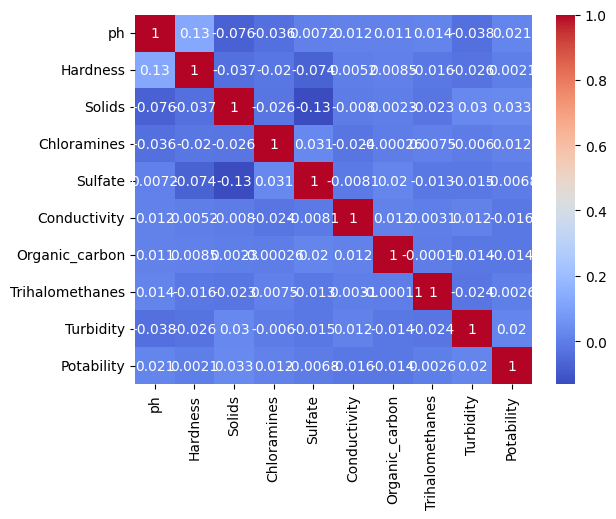

In [65]:
# Feature Correlation Analysis
cor=df.corr()

sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

In [66]:
# test vs train

X=df.drop('Potability',axis=1)
Y=df['Potability']

In [67]:
# Normalization & Standardization

normalizer = MinMaxScaler() 
standardizer = StandardScaler() 

X=normalizer.fit_transform(X)
X=standardizer.fit_transform(X)

In [68]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=62)

In [69]:
model_dt={
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),

    }
accuracy_dt={}
for n,m in model_dt.items():
    m.fit(X_train,Y_train)
    ypred=m.predict(X_test)
    accuracy_dt[n]=accuracy_score(Y_test,ypred)
    
accuracyOrdered=dict(sorted(accuracy_dt.items(),key=lambda item:item[1], reverse=True))
for isim, accuracy in accuracyOrdered.items():
    print(f"{isim} ---> accuracy:{accuracy}")

Support Vector Machine ---> accuracy:0.7220843672456576
Random Forest ---> accuracy:0.6823821339950372
Bagging ---> accuracy:0.6426799007444168
Gradient Boosting ---> accuracy:0.6426799007444168
Decision Tree ---> accuracy:0.6377171215880894
K-Nearest Neighbors ---> accuracy:0.6327543424317618
Naive Bayes ---> accuracy:0.6203473945409429
Logistic Regression ---> accuracy:0.6153846153846154
AdaBoost ---> accuracy:0.6029776674937966
Extra Trees ---> accuracy:0.533498759305211


**OVERVIEW of RESULTS**

* **Support Vector Machine (SVM):** Achieved the highest accuracy at approximately 72.2%. SVMs are effective in high-dimensional spaces and when there is a clear margin of separation between classes. The high accuracy suggests that SVM could efficiently handle the complexity of the dataset and distinguish between potable and non-potable water samples.

* **Random Forest:** Came in second with an accuracy of about 68.2%. Random Forest is an ensemble method that operates by building multiple decision trees and merging their predictions. Its performance indicates that it could capture the nonlinear relationships between features effectively, but not as effectively as SVM in this case.

* **Bagging and Gradient Boosting:** Both had similar accuracies around 64.3%. These ensemble methods combine the predictions of several base estimators to improve robustness and accuracy. Their performance suggests that while they are effective, there might be limitations in how they are capturing the relationships in the data or they might require further tuning.

* **Decision Tree:** With an accuracy close to 63.8%, it shows that a single decision tree could already capture a significant amount of information from the data but is outperformed by ensemble methods and SVM, which is expected due to the higher complexity and generalization capabilities of ensemble methods.
K-Nearest Neighbors (KNN): Had an accuracy of about 63.3%, indicating that the similarity between samples provides a good basis for prediction but might not capture all nuances in the data.

* **Naive Bayes:** Achieved an accuracy of approximately 62%, suggesting that the assumption of feature independence may not hold true for all the features in this dataset, affecting its performance.

* **Logistic Regression:** Had an accuracy of around 61.5%, indicating that the relationship between the feature set and the target variable might not be easily captured by a linear model.

* **AdaBoost:** With an accuracy of about 60.3%, it suggests that this boosting method might not be as effective in this particular case, potentially due to the distribution of data or the choice of base estimators.

* **Extra Trees:** Showed the lowest accuracy at approximately 53.3%, suggesting that this particular ensemble method, while usually robust, might not be suitable for the dataset without further tuning or could be overly fitting to the training data.